In [3]:
!pip install --force-reinstall gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

In [1]:
!pip install --force-reinstall gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninstall

In [2]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import streamlit as st

In [4]:
df = pd.read_csv('/content/drive/MyDrive/truevsfakenews.csv')
print(df.head())
print(df['label'].value_counts())

                                                text label
0  WASHINGTON (Reuters) - The Republican and Demo...  true
1  Women should get as far away from Oklahoma as ...  fake
2  Another huge crowd of Americans tuned in last ...  fake
3  Donald Trump is desperate to stop the investig...  fake
4  (Reuters) - Planned Parenthood, the U.S. medic...  true
label
true    10000
fake    10000
Name: count, dtype: int64


In [5]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [7]:
def to_lower(text):
    return text.lower()

In [8]:
def remove_noise(text):
    text = re.sub(r"http\S+|www\S+|@\S+|#\S+", '', text)
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    return text

In [9]:
def expand_contractions(text):
    contractions = {"don't": "do not", "can't": "cannot", "i'm": "i am"}  # add more
    for c in contractions:
        text = text.replace(c, contractions[c])
    return text

In [10]:
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

In [11]:
def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [12]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags
                               u"\U00002700-\U000027BF"  # dingbats
                               u"\U000024C2-\U0001F251"  # enclosed characters
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [13]:
def clean_text(text):
    text = to_lower(text)
    text = remove_emojis(text)
    text = remove_noise(text)
    text = expand_contractions(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text)
    return text

In [14]:
df['clean_text'] = df['text'].apply(clean_text)

In [15]:
sample = df['text'].iloc[0]
print("Original Text:\n", sample)
print("Lowercased:\n", to_lower(sample))
print("After Emoji Removal:\n", remove_emojis(sample))
print("After Noise Removal:\n", remove_noise(sample))
print("After Expanding Contractions:\n", expand_contractions(sample))
print("After Removing Stopwords:\n", remove_stopwords(expand_contractions(remove_noise(remove_emojis(to_lower(sample))))))
print("Final Cleaned Text:\n", clean_text(sample))
print("Final Cleaned Text:\n", clean_text(sample))

Original Text:
 WASHINGTON (Reuters) - The Republican and Democratic leaders of the U.S. Senate Foreign Relations Committee blasted the U.S. State Department on Tuesday for cuts in staff and what they described as a failure to have a plan for a proposed reorganization. “I don’t think they are anywhere close to having a plan to present relative to the reforms that they want,” said Senator Bob Corker, the Republican chairman of the committee. Rex Tillerson, Republican President Donald Trump’s Secretary of State, has embraced the White House’s proposal - rejected by key members of Congress - to cut the State Department budget by about 30 percent. He has imposed a hiring freeze while analyzing the agency’s operations and deciding how to reorganize them. Tillerson, a former chief executive at Exxon Mobil Corp who took office on Feb. 1, has offered few specifics to ease concerns, including in Congress, that the plan risks weakening U.S. standing in the world. Senator Ben Cardin, the top Demo

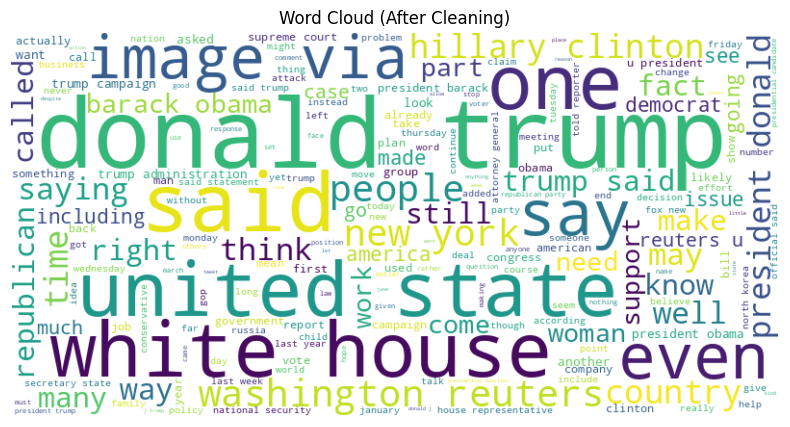

In [16]:
cleaned_texts = df['text'].apply(clean_text)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cleaned_texts))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud (After Cleaning)")
plt.show()

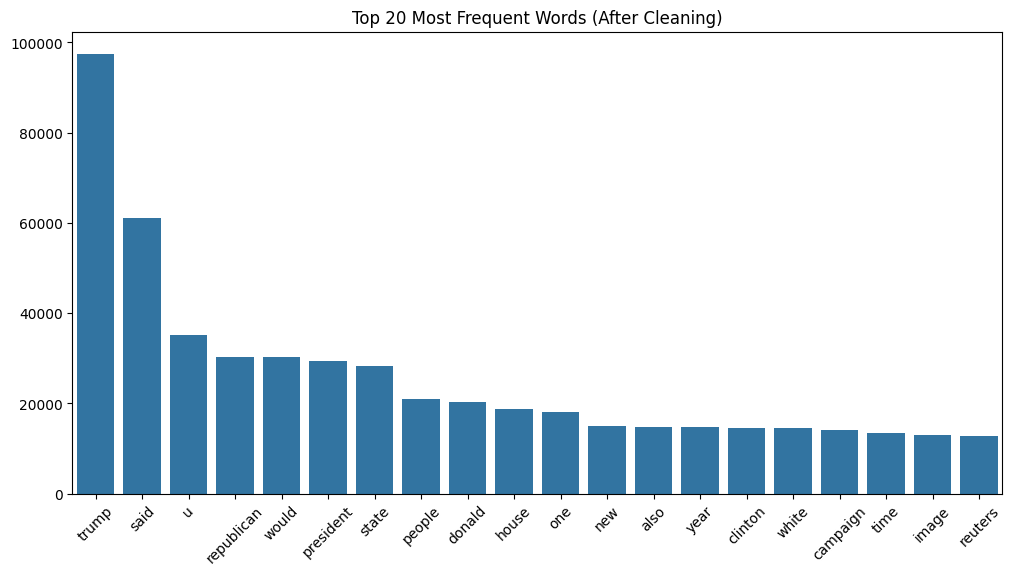

In [17]:
from collections import Counter

all_words = ' '.join(cleaned_texts).split()
most_common = Counter(all_words).most_common(20)

words, counts = zip(*most_common)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts))
plt.title("Top 20 Most Frequent Words (After Cleaning)")
plt.xticks(rotation=45)
plt.show()

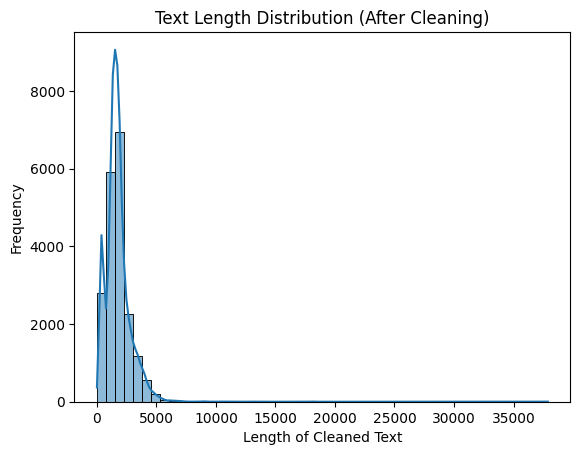

In [18]:
df['cleaned_length'] = cleaned_texts.apply(len)
sns.histplot(df['cleaned_length'], bins=50, kde=True)
plt.title('Text Length Distribution (After Cleaning)')
plt.xlabel('Length of Cleaned Text')
plt.ylabel('Frequency')
plt.show()

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_text'])

sequences = tokenizer.texts_to_sequences(df['clean_text'])
word_index = tokenizer.word_index
max_length = int(np.percentile([len(x) for x in sequences], 95))

padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

X = padded_sequences
y = pd.get_dummies(df['label']).values  # one-hot encode: True/Fake

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from tensorflow.keras.layers import BatchNormalization, Dropout

def build_rnn_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(word_index)+1, output_dim=100, input_length=max_length))
    model.add(SimpleRNN(64, return_sequences=False))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

rnn_model = build_rnn_model()
history_rnn = rnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    callbacks=[EarlyStopping(patience=5)],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 134s 327ms/step - accuracy: 0.5126 - loss: 0.6944 - val_accuracy: 0.5141 - val_loss: 0.7073
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 140s 324ms/step - accuracy: 0.5329 - loss: 0.6681 - val_accuracy: 0.5309 - val_loss: 0.6737
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 150s 345ms/step - accuracy: 0.5208 - loss: 0.6662 - val_accuracy: 0.5159 - val_loss: 0.6890
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 134s 334ms/step - accuracy: 0.5247 - loss: 0.6651 - val_accuracy: 0.5053 - val_loss: 3.0670
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 139s 327ms/step - accuracy: 0.5335 - loss: 0.6612 - val_accuracy: 0.5122 - val_loss: 2.2569
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 145s 336ms/step - accuracy: 0.5186 - loss: 0.6667 - val_accuracy: 0.4894 - val_loss: 5.0758
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 145s 342ms/step - accuracy: 0.5309 - loss: 0.6630 - val_accuracy: 0.5734 - val_loss: 1.2212


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, name):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

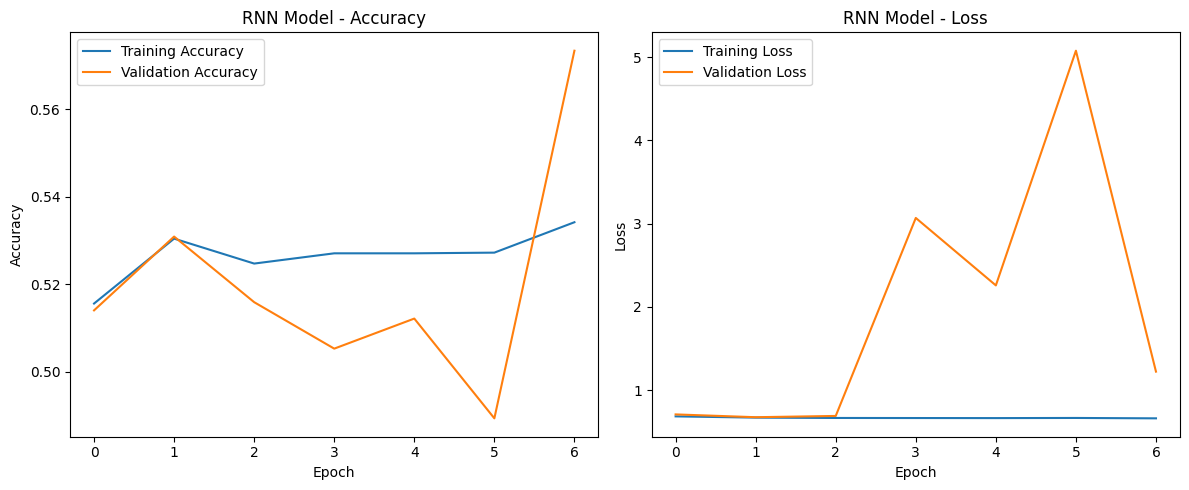

In [22]:
# Plot function
def plot_training_history(history, model_name='RNN Model'):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call plot function
plot_training_history(history_rnn, model_name='RNN Model')

In [25]:
def plot_confusion_matrix(model, name):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

def evaluate_model(model, name):
    """
    Evaluates a model and prints the classification report and accuracy.
    """
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    print(f"--- {name} Evaluation ---")
    print(classification_report(y_true, y_pred_classes))
    print(f"Accuracy: {accuracy_score(y_true, y_pred_classes):.4f}")

In [29]:
report, accuracy = evaluate_model(rnn_model, "RNN Model")
print(f"--- RNN Model Evaluation ---")
print(report)
print(f"Accuracy: {accuracy:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step
--- RNN Model Evaluation ---
              precision    recall  f1-score   support

           0       0.99      0.14      0.24      2055
           1       0.52      1.00      0.69      1945

    accuracy                           0.56      4000
   macro avg       0.75      0.57      0.46      4000
weighted avg       0.76      0.56      0.46      4000

Accuracy: 0.5557


TypeError: cannot unpack non-iterable NoneType object

125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step


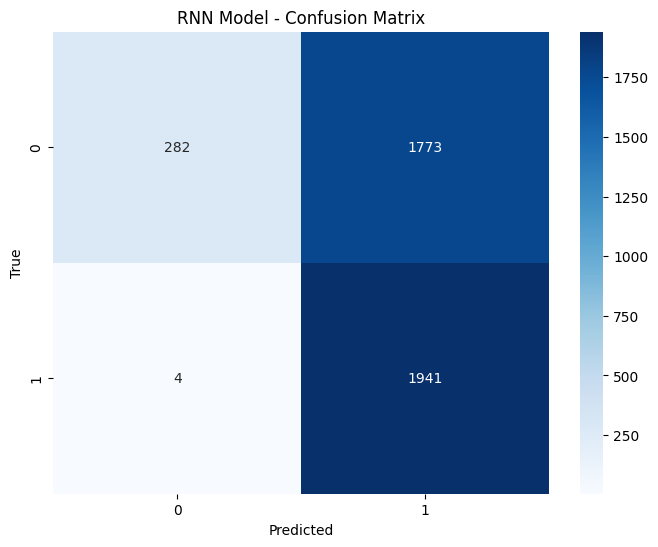

In [30]:
plot_confusion_matrix(rnn_model, "RNN Model")

In [31]:
def build_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(word_index)+1, output_dim=100, input_length=max_length))
    model.add(LSTM(64, return_sequences=False))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

lstm_model = build_lstm_model()
history_lstm = lstm_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    callbacks=[EarlyStopping(patience=5)],
    verbose=1
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


400/400 ━━━━━━━━━━━━━━━━━━━━ 211s 517ms/step - accuracy: 0.5203 - loss: 0.6840 - val_accuracy: 0.5203 - val_loss: 0.7021
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 260s 513ms/step - accuracy: 0.5341 - loss: 0.6646 - val_accuracy: 0.4894 - val_loss: 3.7425
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 206s 516ms/step - accuracy: 0.5399 - loss: 0.6589 - val_accuracy: 0.4894 - val_loss: 6.9909
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 260s 512ms/step - accuracy: 0.5967 - loss: 0.5990 - val_accuracy: 0.9941 - val_loss: 0.0186
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 260s 507ms/step - accuracy: 0.9966 - loss: 0.0108 - val_accuracy: 0.9987 - val_loss: 0.0078
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 263s 510ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 0.5206 - val_loss: 1.3211
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 204s 510ms/step - accuracy: 0.9989 - loss: 0.0042 - val_accuracy: 0.9981 - val_loss: 0.0113
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 264s 516ms/step - accuracy: 0.9998 - loss: 0.00

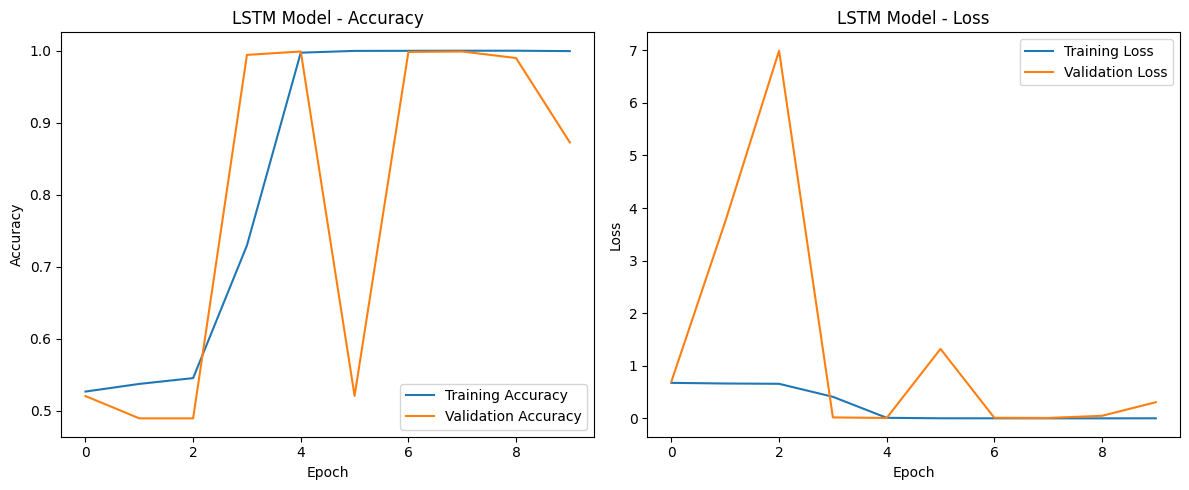

In [32]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name='LSTM Model'):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call it
plot_training_history(history_lstm, model_name='LSTM Model')

125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step
--- LSTM Model Evaluation ---
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      2055
           1       1.00      0.78      0.87      1945

    accuracy                           0.89      4000
   macro avg       0.91      0.89      0.89      4000
weighted avg       0.91      0.89      0.89      4000

Accuracy: 0.8912
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step


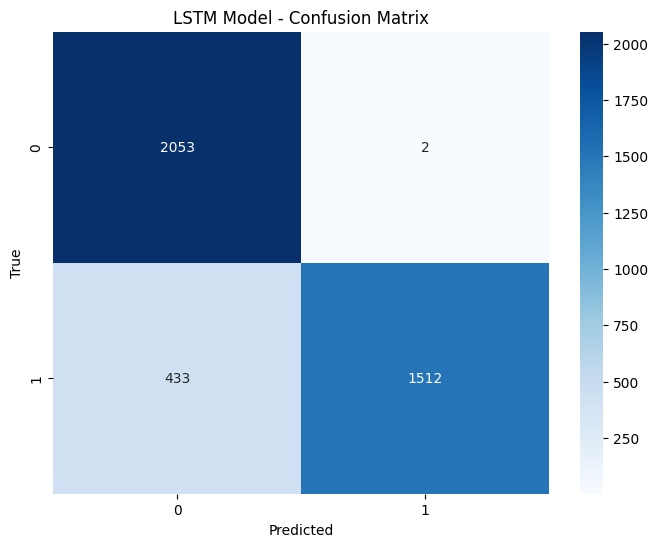

In [33]:
evaluate_model(lstm_model, "LSTM Model")
plot_confusion_matrix(lstm_model, "LSTM Model")

In [34]:
# Prepare Word2Vec
tokenized_text = [text.split() for text in df['clean_text']]
w2v_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1)

embedding_matrix = np.zeros((len(word_index)+1, 100))
for word, i in word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

def build_lstm_w2v_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(word_index)+1, output_dim=100,
                        weights=[embedding_matrix], input_length=max_length, trainable=False))
    model.add(LSTM(64, return_sequences=False))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

w2v_lstm_model = build_lstm_w2v_model()
history_w2v = w2v_lstm_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    callbacks=[EarlyStopping(patience=5)],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 100s 242ms/step - accuracy: 0.7249 - loss: 0.5100 - val_accuracy: 0.8922 - val_loss: 0.2964
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 140s 236ms/step - accuracy: 0.9086 - loss: 0.2722 - val_accuracy: 0.9469 - val_loss: 0.1739
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 141s 234ms/step - accuracy: 0.9547 - loss: 0.1727 - val_accuracy: 0.9294 - val_loss: 0.2119
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 144s 239ms/step - accuracy: 0.9447 - loss: 0.2002 - val_accuracy: 0.9478 - val_loss: 0.1825
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 137s 226ms/step - accuracy: 0.9490 - loss: 0.1897 - val_accuracy: 0.9506 - val_loss: 0.1777
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 94s 234ms/step - accuracy: 0.9598 - loss: 0.1479 - val_accuracy: 0.9497 - val_loss: 0.2084
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 140s 229ms/step - accuracy: 0.9554 - loss: 0.1702 - val_accuracy: 0.9609 - val_loss: 0.1555
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 144s 235ms/step - accuracy: 0.9614 - 

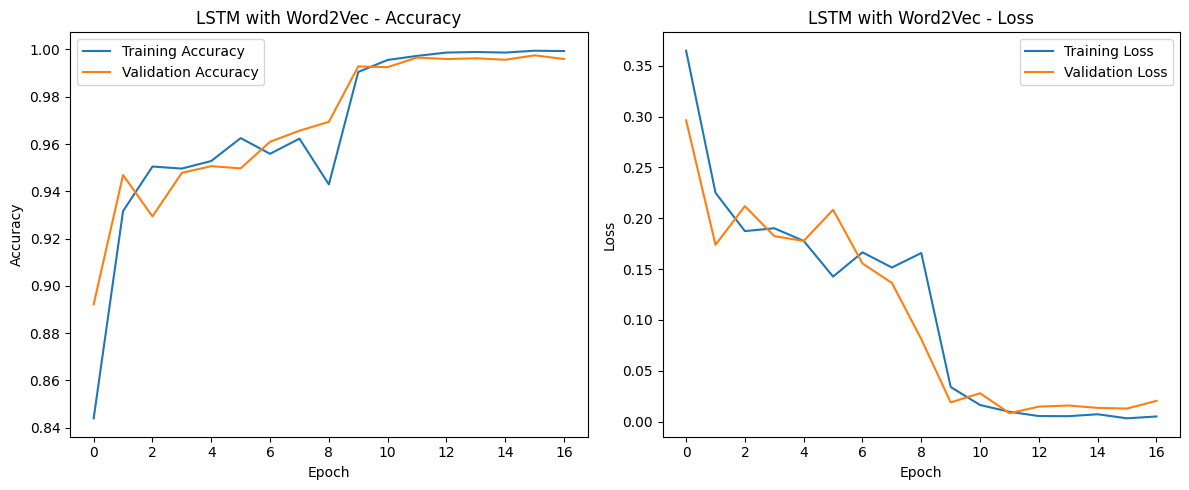

In [35]:
def plot_training_history(history, model_name='Model'):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call plot
plot_training_history(history_w2v, model_name='LSTM with Word2Vec')

125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step
--- Word2Vec LSTM Model Evaluation ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2055
           1       0.99      1.00      1.00      1945

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

Accuracy: 0.9958
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step


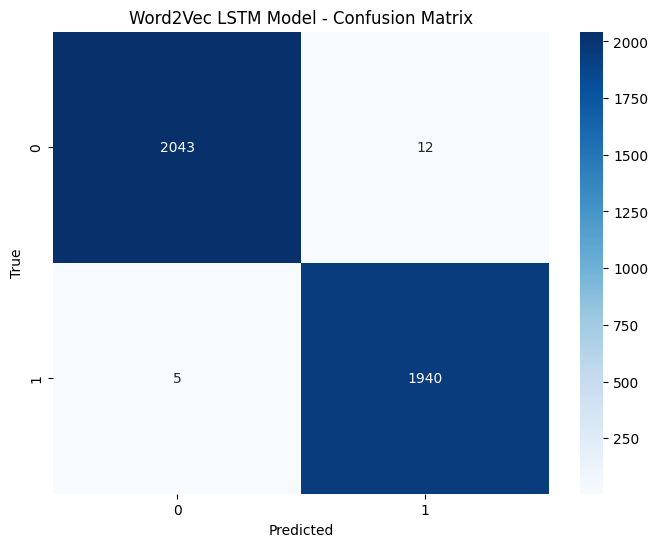

In [36]:
evaluate_model(w2v_lstm_model, "Word2Vec LSTM Model")
plot_confusion_matrix(w2v_lstm_model, "Word2Vec LSTM Model")

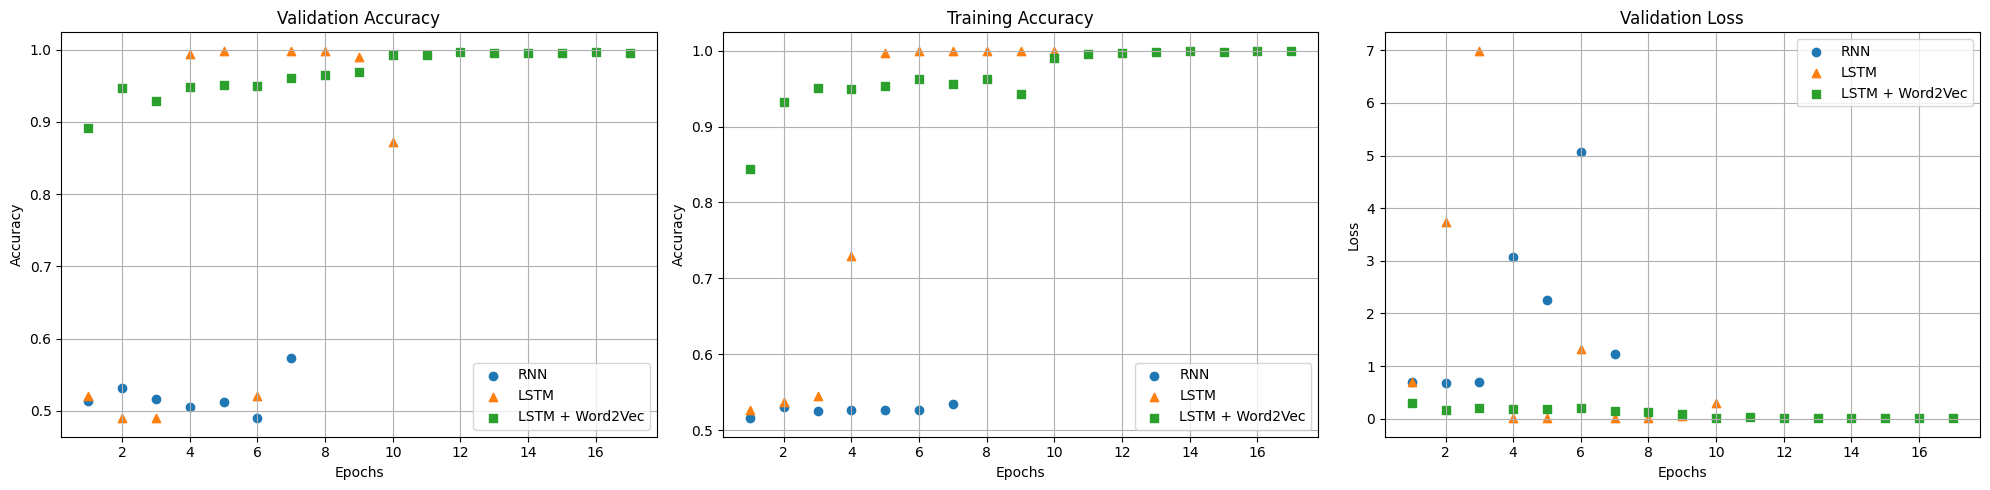

In [37]:
# Extract data
rnn_val_acc = history_rnn.history['val_accuracy']
rnn_acc = history_rnn.history['accuracy']
rnn_val_loss = history_rnn.history['val_loss']

lstm_val_acc = history_lstm.history['val_accuracy']
lstm_acc = history_lstm.history['accuracy']
lstm_val_loss = history_lstm.history['val_loss']

w2v_val_acc = history_w2v.history['val_accuracy']
w2v_acc = history_w2v.history['accuracy']
w2v_val_loss = history_w2v.history['val_loss']

# Epochs
epochs_rnn = range(1, len(rnn_val_acc) + 1)
epochs_lstm = range(1, len(lstm_val_acc) + 1)
epochs_w2v = range(1, len(w2v_val_acc) + 1)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot 1: Validation Accuracy
axs[0].scatter(epochs_rnn, rnn_val_acc, label='RNN', marker='o')
axs[0].scatter(epochs_lstm, lstm_val_acc, label='LSTM', marker='^')
axs[0].scatter(epochs_w2v, w2v_val_acc, label='LSTM + Word2Vec', marker='s')
axs[0].set_title('Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Plot 2: Training Accuracy
axs[1].scatter(epochs_rnn, rnn_acc, label='RNN', marker='o')
axs[1].scatter(epochs_lstm, lstm_acc, label='LSTM', marker='^')
axs[1].scatter(epochs_w2v, w2v_acc, label='LSTM + Word2Vec', marker='s')
axs[1].set_title('Training Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(True)

# Plot 3: Validation Loss
axs[2].scatter(epochs_rnn, rnn_val_loss, label='RNN', marker='o')
axs[2].scatter(epochs_lstm, lstm_val_loss, label='LSTM', marker='^')
axs[2].scatter(epochs_w2v, w2v_val_loss, label='LSTM + Word2Vec', marker='s')
axs[2].set_title('Validation Loss')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Loss')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

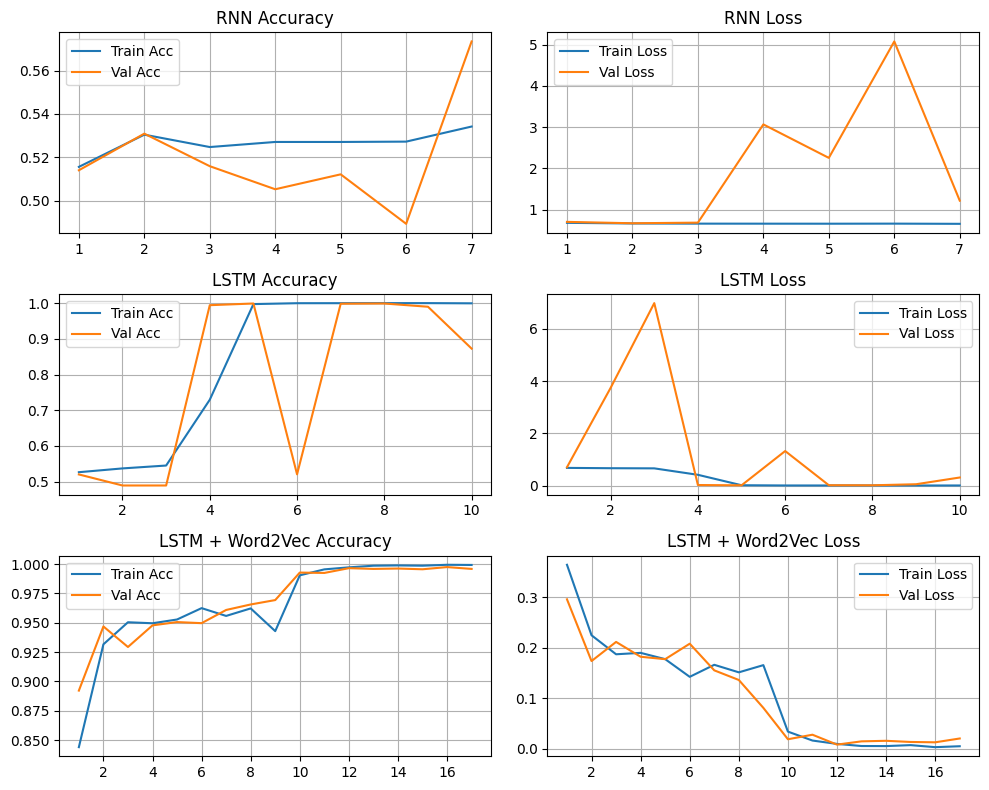

In [38]:
# Epochs
epochs_rnn = range(1, len(history_rnn.history['accuracy']) + 1)
epochs_lstm = range(1, len(history_lstm.history['accuracy']) + 1)
epochs_w2v = range(1, len(history_w2v.history['accuracy']) + 1)

fig, axs = plt.subplots(3, 2, figsize=(10, 8))

#RNN
axs[0, 0].plot(epochs_rnn, history_rnn.history['accuracy'], label='Train Acc')
axs[0, 0].plot(epochs_rnn, history_rnn.history['val_accuracy'], label='Val Acc')
axs[0, 0].set_title('RNN Accuracy')
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[0, 1].plot(epochs_rnn, history_rnn.history['loss'], label='Train Loss')
axs[0, 1].plot(epochs_rnn, history_rnn.history['val_loss'], label='Val Loss')
axs[0, 1].set_title('RNN Loss')
axs[0, 1].legend()
axs[0, 1].grid(True)

#LSTM
axs[1, 0].plot(epochs_lstm, history_lstm.history['accuracy'], label='Train Acc')
axs[1, 0].plot(epochs_lstm, history_lstm.history['val_accuracy'], label='Val Acc')
axs[1, 0].set_title('LSTM Accuracy')
axs[1, 0].legend()
axs[1, 0].grid(True)

axs[1, 1].plot(epochs_lstm, history_lstm.history['loss'], label='Train Loss')
axs[1, 1].plot(epochs_lstm, history_lstm.history['val_loss'], label='Val Loss')
axs[1, 1].set_title('LSTM Loss')
axs[1, 1].legend()
axs[1, 1].grid(True)

#LSTM + Word2Vec
axs[2, 0].plot(epochs_w2v, history_w2v.history['accuracy'], label='Train Acc')
axs[2, 0].plot(epochs_w2v, history_w2v.history['val_accuracy'], label='Val Acc')
axs[2, 0].set_title('LSTM + Word2Vec Accuracy')
axs[2, 0].legend()
axs[2, 0].grid(True)

axs[2, 1].plot(epochs_w2v, history_w2v.history['loss'], label='Train Loss')
axs[2, 1].plot(epochs_w2v, history_w2v.history['val_loss'], label='Val Loss')
axs[2, 1].set_title('LSTM + Word2Vec Loss')
axs[2, 1].legend()
axs[2, 1].grid(True)

plt.tight_layout()
plt.show()

In [40]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.6 MB/s eta 0:00:00


In [41]:
import gradio as gr

def clean_input_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def predict_news(text):
    cleaned = clean_input_text(text)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=max_length)
    pred = w2v_lstm_model.predict(padded)[0]
    label = np.argmax(pred)
    confidence = round(pred[label]*100, 2)
    result = "True News" if label == 1 else "Fake News"
    return f"{result} ({confidence}% confidence)"

In [42]:
interface = gr.Interface(
    fn=predict_news,
    inputs=gr.Textbox(lines=4, placeholder="Enter news text here..."),
    outputs=gr.Textbox(label="Prediction"),
    title="True vs Fake News Classifier",
    description="Enter a news headline or snippet to check if it's real or fake."
)

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://786681f7ff1b43fe29.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [43]:
interface = gr.Interface(
    fn=predict_news,
    inputs=gr.Textbox(lines=4, placeholder="Enter news text here..."),
    outputs=gr.Textbox(label="Prediction"),
    title="True vs Fake News Classifier",
    description="Enter a news headline or snippet to check if it's real or fake."
)

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0fd5be43dc9b4ad841.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
